# Step 1:
Clean and prepare your data: There are several entries where values have been deleted to simulate dirty data. Please clean the data with whatever method(s) you believe is best/most suitable. Note that some of the missing values are truly blank (unknown answers) and thus may be impossible to clean; use your discretion.


In [1]:
import time
import seaborn as sns
import numpy as np

######## Definitions

import time
# Function to convert seconds to hours, minutes, and seconds


def time_passed(end_time,start_time):
    elapsed_time = end_time - start_time
    return(elapsed_time)


def convert_seconds(elapsed_time):
    hours, rem = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds


def print_time_elapsed(times,elapsed_time):
    hours,minutes,seconds=times
    # Print out the time taken in appropriate format
    if elapsed_time < 120:
        return(print(f"The code took {elapsed_time:.2f} seconds to run"))
    elif elapsed_time < 7200:
        return(print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run"))
    else:
        return(print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run"))

        
        
def the_timer(end_time,start_time):
    return(print_time_elapsed(convert_seconds(time_passed(end_time,start_time))))




In [2]:
# Start timing whole notebook
whole_start_time = time.time()

In [3]:
import pandas as pd
#import will2live

In [4]:
df=pd.read_csv('Data for Cleaning & Modeling.csv')

C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\1420825070.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data for Cleaning & Modeling.csv')


In [5]:
df.head(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,...,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,...,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f


## Renaming Columns

In [6]:
# Creating something to switch between the unlabelled columns, and my new column names after looking through the metadata

# mapping from x labels to descriptive names
x_to_var_name = {
    'X1': 'IntRate',
    'X2': 'LoanID',
    'X3': 'BorrowID',
    'X4': 'LoanReq',
    'X5': 'LoanAmt',
    'X6': 'InvLoanPortion',
    'X7': 'NumPays',
    'X8': 'Grade',
    'X9': 'SubGrade',
    'X10': 'Job/Employer',
    'X11': 'YrsEmplyd',
    'X12': 'HOwner',
    'X13': 'AnnInc',
    'X14': 'IncVerif',
    'X15': 'LoanDate',
    'X16': 'Reason',
    'X17': 'Category',
    'X18': 'Title',
    'X19': 'ZIP',
    'X20': 'State',
    'X21': 'MnthlyDebtPays/MnthlyIncome',
    'X22': 'DelinqCount',
    'X23': 'EarliestLine',
    'X24': 'CreditorInq',
    'X25': 'SinceDelinq',
    'X26': 'SincePubRec',
    'X27': 'NumCrLinesOpen',
    'X28': 'NumDerPubRec',
    'X29': 'CrRevolvBalance',
    'X30': 'RevolvUtilRate',
    'X31': 'NumCrLines',
    'X32': 'LoanStatus'
}

# invert dict to map from names to x labels
var_name_to_x = {v: k for k, v in x_to_var_name.items()}

# func to rename DataFrame columns based on a mapping dictionary
def rename_columns(df, mapping):
    return df.rename(columns=mapping)

df=rename_columns(df,x_to_var_name)

In [7]:
# Set the option to display all columns, None means no maximum width
pd.set_option('display.max_columns', None)

df.head(2)

,IntRate,LoanID,BorrowID,LoanReq,LoanAmt,InvLoanPortion,NumPays,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Reason,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,SinceDelinq,SincePubRec,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus
0,11.89%,54734.0,80364.0,"$25,000","$25,000","$19,080",36 months,B,B4,NaN,< 1 year,RENT,85000.0,VERIFIED - income,Aug-09,Due to a lack of personal finance education an...,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,19.48,0.0,Feb-94,0.0,NaN,NaN,10.0,0.0,28854.0,52.10%,42.0,f
1,10.71%,55742.0,114426.0,"$7,000","$7,000",$673,36 months,B,B5,CNN,< 1 year,RENT,65000.0,not verified,May-08,Just want to pay off the last bit of credit ca...,credit_card,Credit Card payoff,112xx,NY,14.29,0.0,Oct-00,0.0,NaN,NaN,7.0,0.0,33623.0,76.70%,7.0,f


## Cleaning 

In [8]:
# drop rows where interest rate is missing
df.dropna(subset=['IntRate'], inplace=True)

In [9]:
df.isna().sum()/df.count()

IntRate                        0.000000
LoanID                         0.000003
BorrowID                       0.000003
LoanReq                        0.000003
LoanAmt                        0.000003
InvLoanPortion                 0.000003
NumPays                        0.000003
Grade                          0.180644
SubGrade                       0.180644
Job/Employer                   0.063555
YrsEmplyd                      0.045636
HOwner                         0.181026
AnnInc                         0.180171
IncVerif                       0.000003
LoanDate                       0.000003
Reason                         2.226786
Category                       0.000003
Title                          0.000050
ZIP                            0.000003
State                          0.000003
MnthlyDebtPays/MnthlyIncome    0.000003
DelinqCount                    0.000003
EarliestLine                   0.000003
CreditorInq                    0.000003
SinceDelinq                    1.207929


### Determine which columns are missing data, and drop some


In [10]:
# Determine which columns are missing data, and drop some

for i in df.columns:
    print(i,"percent missing: ",(len(df[df[i].isna()])/len(df)))
    
# Reason is missing nearly 70% of time, so will drop ( at least for now ) 
# Since Delinq and SincePubRec also missing more than 50% of time

df.drop(['Reason','SinceDelinq','SincePubRec'],axis=1,inplace=True)

IntRate percent missing:  0.0
LoanID percent missing:  2.949939526239712e-06
BorrowID percent missing:  2.949939526239712e-06
LoanReq percent missing:  2.949939526239712e-06
LoanAmt percent missing:  2.949939526239712e-06
InvLoanPortion percent missing:  2.949939526239712e-06
NumPays percent missing:  2.949939526239712e-06
Grade percent missing:  0.15300451340747515
SubGrade percent missing:  0.15300451340747515
Job/Employer percent missing:  0.05975692498303785
YrsEmplyd percent missing:  0.04364435529071654
HOwner percent missing:  0.15327885778341543
AnnInc percent missing:  0.15266527036195757
IncVerif percent missing:  2.949939526239712e-06
LoanDate percent missing:  2.949939526239712e-06
Reason percent missing:  0.690094103070887
Category percent missing:  2.949939526239712e-06
Title percent missing:  5.0148971946075105e-05
ZIP percent missing:  2.949939526239712e-06
State percent missing:  2.949939526239712e-06
MnthlyDebtPays/MnthlyIncome percent missing:  2.949939526239712e-06


In [11]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 338990 entries, 0 to 399999
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IntRate                      338990 non-null  object 
 1   LoanID                       338989 non-null  float64
 2   BorrowID                     338989 non-null  float64
 3   LoanReq                      338989 non-null  object 
 4   LoanAmt                      338989 non-null  object 
 5   InvLoanPortion               338989 non-null  object 
 6   NumPays                      338989 non-null  object 
 7   Grade                        287123 non-null  object 
 8   SubGrade                     287123 non-null  object 
 9   Job/Employer                 318733 non-null  object 
 10  YrsEmplyd                    324195 non-null  object 
 11  HOwner                       287030 non-null  object 
 12  AnnInc                       287238 non-null  float64
 13  IncV

## Turn Yrs Employed into numerical column
### Likely worse in terms of performance, but easier to handle.
### With enough time and resources, I would come back to swap and see how model performance is affected by this being a categorical or numerical variable.
### I would imagine it does better, as the difference between 9 and 10+ can be a huge difference.
### It does however slow the model, as some type of encoding is needed.

In [12]:
print(set(df['YrsEmplyd']))

# dict to map strings to numerical
string_to_num = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10.5, 
    'nan': 0
}

# invert dict to map the reverse if needed
num_to_string = {v: k for k, v in string_to_num.items()}

# func to convert df column from string to num
def convert_to_numerical(df, column_name):
    df[column_name] = df[column_name].replace(string_to_num)
    df[column_name] = df[column_name].astype(float)
    return df

# func to convert df column from num to strings
def convert_to_string(df, column_name):
    # Replace NaNs with the string 'nan' before conversion
    df[column_name] = df[column_name].fillna('nan').astype(str)
    df[column_name] = df[column_name].replace(num_to_string)
    return df


df = convert_to_numerical(df, 'YrsEmplyd')



{'8 years', '6 years', '1 year', nan, '5 years', '7 years', '3 years', '9 years', '4 years', '2 years', '10+ years', '< 1 year'}


C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\3348387259.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column_name] = df[column_name].replace(string_to_num)


## Cleaning LoanAmounts and LoanReq to be numerical
## Also cleaning LoanPortion to create a fraction of it relative to the loan amount

In [13]:
df['LoanAmt'][0][1:].replace(",","")

'25000'

In [14]:
df['LoanAmt']=df['LoanAmt'].astype(str)
df['LoanAmt']=df['LoanAmt'].apply(lambda x: x[1:].replace(",",""))
df['LoanAmt']=df['LoanAmt'].astype(int,errors='ignore')
df=df[df['LoanAmt']!='an']
df['LoanAmt']=df['LoanAmt'].astype(int)

In [15]:
df['LoanReq']=df['LoanReq'].astype(str)
df['LoanReq']=df['LoanReq'].apply(lambda x: x[1:].replace(",",""))
df['LoanReq']=df['LoanReq'].astype(int,errors='ignore')
#df[df['LoanReq']=='an']
#df=df[df['LoanReq']!='an']

In [16]:
df['InvLoanPortion']=df['InvLoanPortion'].astype(str)
df['InvLoanPortion']=df['InvLoanPortion'].apply(lambda x: x[1:].replace(",",""))
df['InvLoanPortion']=df['InvLoanPortion'].astype(int,errors='ignore')
df[df['InvLoanPortion']=='an']
#df=df[df['InvLoanPortion']!='an']

,IntRate,LoanID,BorrowID,LoanReq,LoanAmt,InvLoanPortion,NumPays,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus


In [17]:
df['PortionLoanFrac']=df.apply(lambda row: row['InvLoanPortion']/row['LoanAmt'] if row['InvLoanPortion']!=0 else 0, axis=1)

## Clean Interest Rate to non-string value


In [18]:
## CLean Interest Rate to non-string value

df['IntRate']=df['IntRate'].astype(str).apply(lambda x: x[:-1])
df['IntRate']=pd.to_numeric(df['IntRate'],errors='coerce')
df['IntRate']=df['IntRate'].apply(lambda x: x/100)
df['IntRate']

0         0.1189
1         0.1071
2         0.1699
3         0.1311
4         0.1357
           ...  
399995    0.1299
399996    0.1629
399997    0.1099
399998    0.1757
399999    0.1335
Name: IntRate, Length: 338989, dtype: float64

## CLean Revolv Util Rate to non-string value


In [19]:
# CLean Revolv Util Rate to non-string value

df['RevolvUtilRate']=df['RevolvUtilRate'].astype(str).apply(lambda x: x[:-1])
df['RevolvUtilRate']=pd.to_numeric(df['RevolvUtilRate'],errors='coerce')
df['RevolvUtilRate']=df['RevolvUtilRate'].apply(lambda x: x/100)
df['RevolvUtilRate']

0         0.521
1         0.767
2         0.663
3         0.404
4         0.256
          ...  
399995    0.761
399996    0.378
399997    0.693
399998    0.390
399999    0.537
Name: RevolvUtilRate, Length: 338989, dtype: float64

## Inspecting and Dealing with some categorical variables

In [20]:
# Ranked list basically,  with each worst than last,  will leave as is for now.
sorted(list(set(df['IncVerif'])))

['VERIFIED - income', 'VERIFIED - income source', 'not verified']

In [21]:
# Numpays always 36 or 60,
# so we will make it a binary variable
# with 1= 60 months 
sorted(list(set(df['NumPays'])))

[' 36 months', ' 60 months']

In [22]:
df['60Payments']=df['NumPays'].apply(lambda x: 1 if x=="60 months" else 0)

In [23]:
df.drop(['NumPays'],axis=1,inplace=True)

In [24]:
df.drop(['LoanID','BorrowID'],axis=1,inplace=True)

## Clean some items to int 

In [25]:
df['NumCrLines']=df['NumCrLines'].astype(int)
df['CreditorInq']=df['CreditorInq'].astype(int)

In [26]:
df.head(2)

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus,PortionLoanFrac,60Payments
0,0.1189,25000,25000,19080,B,B4,NaN,0.5,RENT,85000.0,VERIFIED - income,Aug-09,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,19.48,0.0,Feb-94,0,10.0,0.0,28854.0,0.521,42,f,0.763200,0
1,0.1071,7000,7000,673,B,B5,CNN,0.5,RENT,65000.0,not verified,May-08,credit_card,Credit Card payoff,112xx,NY,14.29,0.0,Oct-00,0,7.0,0.0,33623.0,0.767,7,f,0.096143,0


## Inspecting and Dealing with some categorical variables

In [27]:
typedf=pd.DataFrame(df.dtypes).reset_index()
typedf[typedf[0]=='object']

,index,0
4,Grade,object
5,SubGrade,object
6,Job/Employer,object
8,HOwner,object
10,IncVerif,object
11,LoanDate,object
12,Category,object
13,Title,object
14,ZIP,object
15,State,object


In [28]:
df[list(typedf[typedf[0]=='object']['index'])].head(2)

,Grade,SubGrade,Job/Employer,HOwner,IncVerif,LoanDate,Category,Title,ZIP,State,EarliestLine,LoanStatus
0,B,B4,NaN,RENT,VERIFIED - income,Aug-09,debt_consolidation,Debt consolidation for on-time payer,941xx,CA,Feb-94,f
1,B,B5,CNN,RENT,not verified,May-08,credit_card,Credit Card payoff,112xx,NY,Oct-00,f


In [29]:
set(list(df['Category']))

{'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

## Logic for Grades

### using Grade and Subgrade is repetitive
### check that subgrade and grade always are logically consistent

In [30]:

# using Grade and Subgrade is repetitive
# check that subgrade and grade always are logically consistent

def check_consistency(row):
    # check if either is nan
    if pd.isnull(row['Grade']) or pd.isnull(row['SubGrade']):
        return False  # (just to see in the inconsistent)
    
    #  first character of the SubGrade to compare with Grade
    return row['SubGrade'][0] == row['Grade']


df['Consistent'] = df.apply(check_consistency, axis=1)

# check
inconsistencies = df[~df['Consistent']]
print( {len(inconsistencies)} )


{51866}


In [31]:
inconsistencies[~inconsistencies['Grade'].isna()]

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus,PortionLoanFrac,60Payments,Consistent


In [32]:
# Looks like all of the times they don't match is actually just NA,
# So we'll drop one column.

In [33]:
df['Grade']

0         B
1         B
2         D
3         C
4         C
         ..
399995    C
399996    D
399997    B
399998    D
399999    C
Name: Grade, Length: 338989, dtype: object

In [34]:
len(df[df['Grade'].isna()]),len(df['SubGrade'].isna())

(51866, 338989)

In [35]:
for i in df.columns:
    if len(df[df[i].isna()])>0:
        print(i,"percent missing: ",str((len(df[df[i].isna()])/len(df)))[:4],"%")

Grade percent missing:  0.15 %
SubGrade percent missing:  0.15 %
Job/Employer percent missing:  0.05 %
YrsEmplyd percent missing:  0.04 %
HOwner percent missing:  0.15 %
AnnInc percent missing:  0.15 %
Title percent missing:  4.71 %
RevolvUtilRate percent missing:  0.00 %


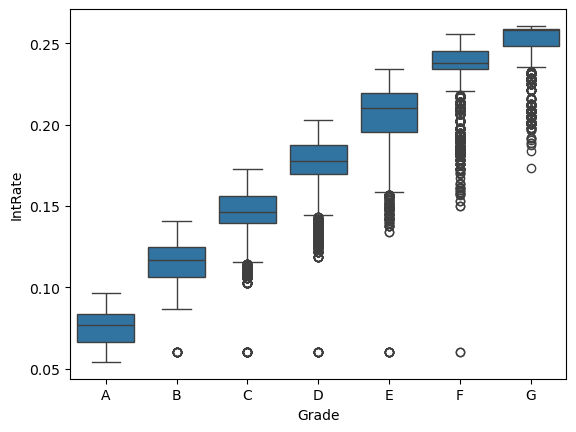

In [36]:
grade_means=df.groupby(by='Grade')['IntRate'].mean().sort_values(ascending=True)

import matplotlib.pyplot as plt
sns.boxplot(data=df,x='Grade',y='IntRate',order=grade_means.index)
plt.show()

<Axes: >

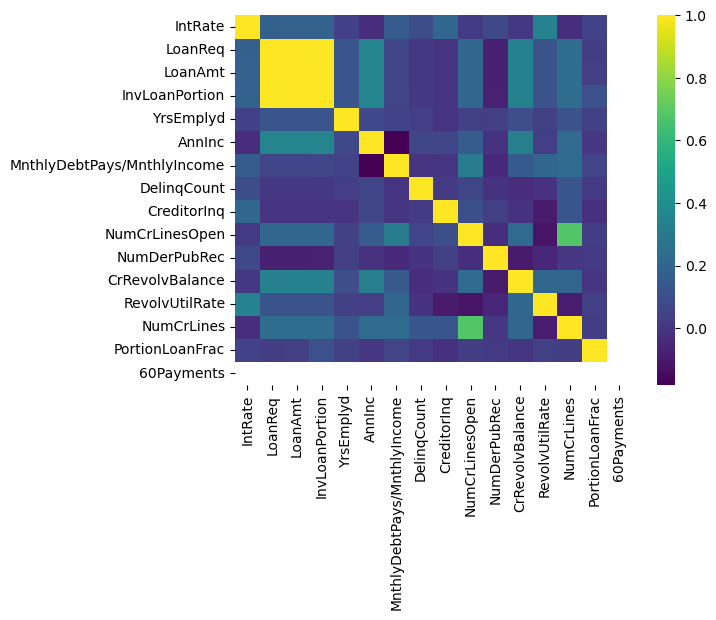

In [37]:
newdf=df.select_dtypes(include=[np.number])
sns.heatmap(newdf.corr(),cmap='viridis')

In [38]:
grade_dumm=pd.get_dummies(df['Grade'])
grade_dumm =grade_dumm.replace({True: 1, False: 0})

C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\2732653874.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  grade_dumm =grade_dumm.replace({True: 1, False: 0})


In [39]:
import seaborn as sns

<Axes: >

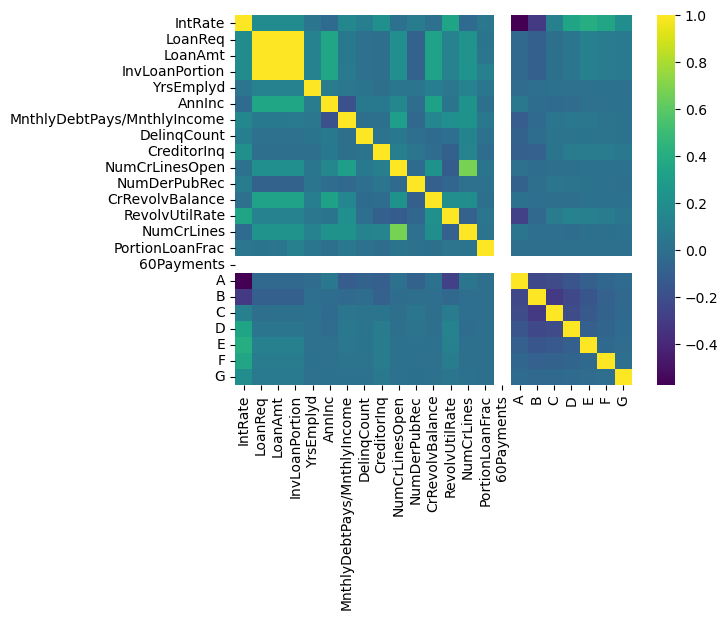

In [40]:
sns.heatmap(pd.concat([newdf,grade_dumm],axis=1).corr(),cmap='viridis')

In [41]:
from sklearn.neighbors import KNeighborsRegressor


## Business Case Notes:

### I'd like to note that if I wasn't using an ancient work laptop, I'd keep subgrade instead of grade, but in this situation I will keep grade.   for now at least


### In a similar manner, with ZIP, State offers no novel information.
### in ideal circumstances, ZIP would be used, but here state will be used.

#### When considering using ZIP, it's important to realize that this might introduce bias into the model.  As it might push certain zip codes to have higher or lower interest rates. This is another reason State might be better than ZIP, as this helps to mitigate that concern.

In [42]:
# df.drop(['SubGrade'],axis=1,inplace=True)

## In the latest version of this script, we later use KNN to fill missing values of Subgrade and Grade 

In [43]:
df.drop(['ZIP'],axis=1,inplace=True)

## More Cleaning 

In [44]:
df.groupby(by=["Job/Employer"]).count()['IntRate'].sort_values(ascending=False)[:25]
# There's a ridiculous amount of jobs.  Let's take the top 25,  clean them up, and then put anything else in "Other"

Job/Employer
Teacher                     3602
Manager                     2875
Registered Nurse            1537
RN                          1452
Supervisor                  1286
Project Manager             1095
Sales                       1048
Office Manager               912
Owner                        870
manager                      866
Driver                       842
General Manager              806
Director                     783
teacher                      761
Engineer                     704
Vice President               618
driver                       612
President                    557
Administrative Assistant     549
Operations Manager           548
Attorney                     543
supervisor                   524
Accountant                   524
US Army                      514
Police Officer               485
Name: IntRate, dtype: int64

In [45]:
df['Job/Employer']=df['Job/Employer'].str.replace('driver',"Driver")
df['Job/Employer']=df['Job/Employer'].str.replace('RN',"Registered Nurse")
df['Job/Employer']=df['Job/Employer'].str.replace('registered nurse',"Registered Nurse")
df['Job/Employer']=df['Job/Employer'].str.replace('teacher',"Teacher")
df['Job/Employer']=df['Job/Employer'].str.replace('Office Manager',"Manager")
df['Job/Employer']=df['Job/Employer'].str.replace('manager',"Manager")
df['Job/Employer']=df['Job/Employer'].str.replace('supervisor',"Supervisor")
df['Job/Employer']=df['Job/Employer'].str.replace('owner',"Owner")
df['Job/Employer']=df['Job/Employer'].str.replace('sales',"Sales")

simple_job_list=set(df.groupby(by=["Job/Employer"]).count()['IntRate'].sort_values(ascending=False)[:25].index)

df.groupby(by=["Job/Employer"]).count()['IntRate'].sort_values(ascending=False)[:25]

Job/Employer
Manager                     4653
Teacher                     4363
Registered Nurse            3293
Supervisor                  1810
Sales                       1509
Driver                      1454
Owner                       1327
Project Manager             1165
General Manager              917
Director                     783
Engineer                     704
Vice President               618
Sales Manager                609
Operations Manager           589
President                    557
Administrative Assistant     549
Attorney                     543
Store Manager                528
Accountant                   524
Truck Driver                 518
US Army                      514
Police Officer               485
Account Manager              471
Executive Assistant          444
Assistant Manager            427
Name: IntRate, dtype: int64

In [46]:
def clean_jobs(job):
    if job in simple_job_list:
        return(job)
    else:
        return("Other")

In [47]:
df['JobCleaned']=df['Job/Employer'].apply(clean_jobs)
set(df['JobCleaned'])

{'Account Manager',
 'Accountant',
 'Administrative Assistant',
 'Assistant Manager',
 'Attorney',
 'Director',
 'Driver',
 'Engineer',
 'Executive Assistant',
 'General Manager',
 'Manager',
 'Operations Manager',
 'Other',
 'Owner',
 'Police Officer',
 'President',
 'Project Manager',
 'Registered Nurse',
 'Sales',
 'Sales Manager',
 'Store Manager',
 'Supervisor',
 'Teacher',
 'Truck Driver',
 'US Army',
 'Vice President'}

In [48]:
df['Job/Employer']=df['JobCleaned']
df.drop(['JobCleaned'],axis=1,inplace=True)

In [49]:
set(df['HOwner'])

{'ANY', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT', nan}

In [50]:
import numpy as np

In [51]:
df['HOwner'] = df['HOwner'].replace('NONE', np.nan)

In [52]:
typedf=pd.DataFrame(df.dtypes).reset_index()
typedf[typedf[0]=='object']

,index,0
4,Grade,object
5,SubGrade,object
6,Job/Employer,object
8,HOwner,object
10,IncVerif,object
11,LoanDate,object
12,Category,object
13,Title,object
14,State,object
17,EarliestLine,object


## TEXT MINING CAN BE APPLIED HERE, SKIPPING FOR NOW

In [53]:
#set(df['Title'])
# Title is too messy, will drop for now 
df.drop(['Title'],axis=1,inplace=True)

In [54]:
typedf=pd.DataFrame(df.dtypes).reset_index()
typedf[typedf[0]=='object']

,index,0
4,Grade,object
5,SubGrade,object
6,Job/Employer,object
8,HOwner,object
10,IncVerif,object
11,LoanDate,object
12,Category,object
13,State,object
16,EarliestLine,object
23,LoanStatus,object


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IntRate,338989.0,0.139463,0.043779,0.0542,0.1099,0.1368,0.1678,2.606000e-01
LoanReq,338989.0,14276.968353,8252.264104,500.0000,8000.0000,12000.0000,20000.0000,3.500000e+04
LoanAmt,338989.0,14248.306140,8238.064335,500.0000,8000.0000,12000.0000,20000.0000,3.500000e+04
InvLoanPortion,338989.0,14182.000445,8255.138412,0.0000,8000.0000,12000.0000,19900.0000,3.500000e+04
YrsEmplyd,324195.0,6.198994,3.739233,0.5000,3.0000,6.0000,10.5000,1.050000e+01
AnnInc,287238.0,73151.464096,56189.665971,3000.0000,45000.0000,63000.0000,88078.7500,7.500000e+06
MnthlyDebtPays/MnthlyIncome,338989.0,16.997242,7.697223,0.0000,11.2500,16.7000,22.5000,3.999000e+01
DelinqCount,338989.0,0.274286,0.779294,0.0000,0.0000,0.0000,0.0000,2.900000e+01
CreditorInq,338989.0,0.817911,1.059264,0.0000,0.0000,0.0000,1.0000,8.000000e+00
NumCrLinesOpen,338989.0,11.118081,4.896081,0.0000,8.0000,10.0000,14.0000,7.600000e+01


## Loan date and loan status wouldn't be known at loan origination, so dropped

In [56]:
df.drop(['LoanDate','LoanStatus'],axis=1,inplace=True)

In [57]:
df.drop(['Consistent'],axis=1,inplace=True)

In [58]:
df.columns

Index(['IntRate', 'LoanReq', 'LoanAmt', 'InvLoanPortion', 'Grade', 'SubGrade',
       'Job/Employer', 'YrsEmplyd', 'HOwner', 'AnnInc', 'IncVerif', 'Category',
       'State', 'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'EarliestLine',
       'CreditorInq', 'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance',
       'RevolvUtilRate', 'NumCrLines', 'PortionLoanFrac', '60Payments'],
      dtype='object')

<Axes: xlabel='MnthlyDebtPays/MnthlyIncome', ylabel='Count'>

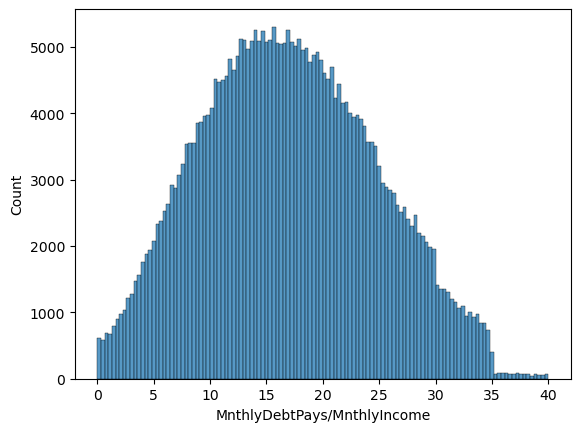

In [59]:
import seaborn as sns
sns.histplot(data=df,x='MnthlyDebtPays/MnthlyIncome')

In [60]:
df.head(67).tail(3)

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments
69,0.1186,3000,3000,525,D,D1,Other,2.0,MORTGAGE,36153.0,not verified,debt_consolidation,IN,7.47,0.0,Jul-00,2,3.0,1.0,1064.0,0.709,6,0.175,0
70,0.0807,3500,3500,3500,A,A4,Other,5.0,RENT,98000.0,not verified,credit_card,NJ,8.52,1.0,Nov-93,0,19.0,0.0,6432.0,0.060,37,1.000,0
71,0.1059,1000,1000,950,C,C2,Other,2.0,MORTGAGE,33990.0,not verified,wedding,VA,14.47,0.0,Jul-04,1,9.0,0.0,4485.0,0.369,11,0.950,0


In [61]:
set(df['Category'])

{'car',
 'credit_card',
 'debt_consolidation',
 'educational',
 'home_improvement',
 'house',
 'major_purchase',
 'medical',
 'moving',
 'other',
 'renewable_energy',
 'small_business',
 'vacation',
 'wedding'}

In [62]:
#set(df['EarliestLine'])

## Logic to clean the Earliest Line to create a column that estimates how long ago the earliest line was

## There is extra logic that isn't immediately useful here, but is required as some of the test data has date formats that are not the same


In [63]:
df['FirstLine']=df['EarliestLine'].apply(lambda x: x[-2:])

In [64]:
df['FirstLine'][:5]

0    94
1    00
2    00
3    85
4    96
Name: FirstLine, dtype: object

In [65]:
df[['FirstLine','EarliestLine']].head(100).tail(2)

,FirstLine,EarliestLine
106,91,Jun-91
107,92,Sep-92


In [66]:
df[df['FirstLine'].astype(int)<44][['EarliestLine','FirstLine']].head(5).tail(3)

,EarliestLine,FirstLine
6,Nov-00,00
9,Jun-01,01
10,Jun-06,06


### Just based on the data we have to assume 44 and up in years is 1944+
### and 00 → anything less than 2024 is 2000's 

In [67]:
# Idea here is to apply the logic mentioned directly above.

# Else returns none for the test data, where the format is something like 09-Aug
# With the limited info given, we have to assume those mean the most recent August (or whatever month)


def clean_year(x):
    if x.isdigit():
        if int(x)<24:
            return(int('20'+x))
        elif int(x)>=24:
            return(int('19'+x))
    else:
        return None


In [68]:
df['FirstLineYear']=df['FirstLine'].apply(clean_year)

In [69]:
df['FirstLineYear']=df['FirstLineYear']

In [70]:
minyear=min([1944,df['FirstLineYear'].min()])

# Since we'll apply the same logic to the test df,  we want to say years since the earliest cr line, regardless of which dataset it's from


In [71]:
df['YrsSinceFirstLine']=df['FirstLineYear'].max()-df['FirstLineYear']

In [72]:
df.drop(['EarliestLine','FirstLine','FirstLineYear'],axis=1,inplace=True)

## Final cleaning and imputing

In [73]:
for i in df.columns:
    print(i,"percent missing: ",(len(df[df[i].isna()])/len(df)))

IntRate percent missing:  0.0
LoanReq percent missing:  0.0
LoanAmt percent missing:  0.0
InvLoanPortion percent missing:  0.0
Grade percent missing:  0.15300201481464
SubGrade percent missing:  0.15300201481464
Job/Employer percent missing:  0.0
YrsEmplyd percent missing:  0.043641534091076704
HOwner percent missing:  0.15336485844673425
AnnInc percent missing:  0.152662770768373
IncVerif percent missing:  0.0
Category percent missing:  0.0
State percent missing:  0.0
MnthlyDebtPays/MnthlyIncome percent missing:  0.0
DelinqCount percent missing:  0.0
CreditorInq percent missing:  0.0
NumCrLinesOpen percent missing:  0.0
NumDerPubRec percent missing:  0.0
CrRevolvBalance percent missing:  0.0
RevolvUtilRate percent missing:  0.0006607884031635245
NumCrLines percent missing:  0.0
PortionLoanFrac percent missing:  0.0
60Payments percent missing:  0.0
YrsSinceFirstLine percent missing:  0.0


In [74]:
# Impute HOwner and Grade with respective modes
# Calculate the mode for each column
howner_mode = df['HOwner'].mode()[0]
grade_mode = df['Grade'].mode()[0]

# Fill NaN values with the mode
df['HOwner'].fillna(howner_mode, inplace=True)
#df['Grade'].fillna(grade_mode, inplace=True)

### Temporarily removing the above line, as we will try to fill in Grade with KNN below

C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\4101472597.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['HOwner'].fillna(howner_mode, inplace=True)


In [75]:
# For 'YrsEmplyd', let's use the median to impute missing values
yrs_emplyd_median = df['YrsEmplyd'].median()
df['YrsEmplyd'].fillna(yrs_emplyd_median, inplace=True)

# For 'AnnInc', let's assume we've checked the distribution and decided on median
ann_inc_median = df['AnnInc'].median()
df['AnnInc'].fillna(ann_inc_median, inplace=True)

# For 'RevolvUtilRate', we can use the mean
revolv_util_rate_mean = df['RevolvUtilRate'].mean()
df['RevolvUtilRate'].fillna(revolv_util_rate_mean, inplace=True)


C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\690154768.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YrsEmplyd'].fillna(yrs_emplyd_median, inplace=True)
C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\690154768.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [76]:
### Coming back to KNN

# We want to try to fill in grade and subgrade using KNN
# our test dataset doesn't miss any subgrade or grade values, so using KNN to predict 

In [77]:
df_copy=df.copy()

In [78]:
mean_by_sg=df_copy.groupby(['SubGrade'])['CreditorInq'].mean().sort_values(ascending=True)


In [79]:
mean_by_g=df_copy.groupby(['Grade'])['CreditorInq'].mean().sort_values(ascending=True)

In [80]:
mean_by_g

Grade
A    0.535266
B    0.656913
C    0.877077
D    1.020369
E    1.130618
F    1.331745
G    1.579545
Name: CreditorInq, dtype: float64

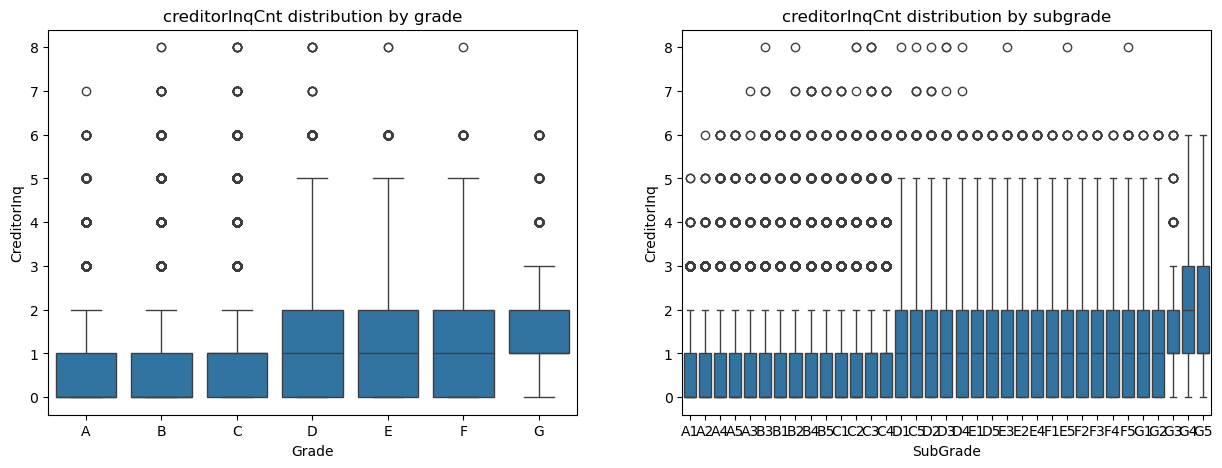

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df_copy, x="Grade", y="CreditorInq", ax=axes[0], order=mean_by_g.index).set_title("creditorInqCnt distribution by grade")
sns.boxplot(data=df_copy, x="SubGrade", y="CreditorInq", ax=axes[1], order=mean_by_sg.index).set_title("creditorInqCnt distribution by subgrade")
plt.show()

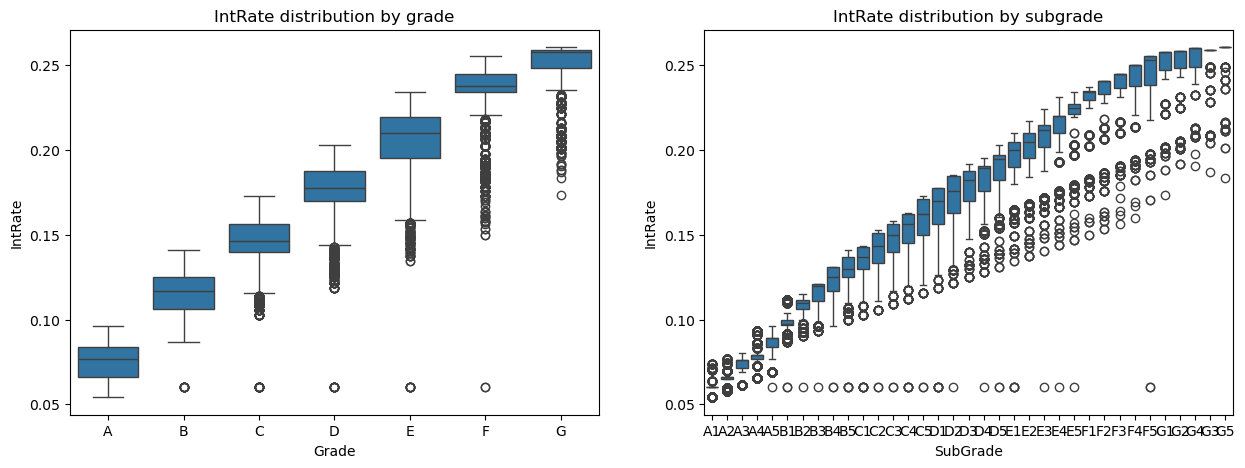

In [82]:
mean_by_sg=df_copy.groupby(['SubGrade'])['IntRate'].mean().sort_values(ascending=True)

mean_by_g=df_copy.groupby(['Grade'])['IntRate'].mean().sort_values(ascending=True)



fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(data=df_copy, x="Grade", y="IntRate", ax=axes[0], order=mean_by_g.index).set_title("IntRate distribution by grade")
sns.boxplot(data=df_copy, x="SubGrade", y="IntRate", ax=axes[1], order=mean_by_sg.index).set_title("IntRate distribution by subgrade")
plt.show()

In [83]:
'''def fill_missing_grades(df,col):
    knn_train=df[[col,'intRate','CreditorInq']]
    knn_test=knn_train[knn_train[col].isna()
    '''

"def fill_missing_grades(df,col):\n    knn_train=df[[col,'intRate','CreditorInq']]\n    knn_test=knn_train[knn_train[col].isna()\n    "

In [84]:
#knn_train=df[['Grade','intRate','CreditorInq]]
              

In [85]:
df[df['Grade'].isna()]

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
165,0.0775,9850,9850,4125,NaN,NaN,Other,2.0,RENT,70000.0,not verified,other,NY,9.09,0.0,1,12.0,0.0,1790.0,0.045,22,0.418782,0,20
182,0.1154,18000,18000,565,NaN,NaN,Other,2.0,RENT,27000.0,not verified,medical,FL,10.80,0.0,0,5.0,0.0,8537.0,0.755,5,0.031389,0,17
212,0.1028,15000,15000,350,NaN,NaN,Other,1.0,RENT,50000.0,not verified,debt_consolidation,NJ,11.88,0.0,0,15.0,0.0,13867.0,0.337,24,0.023333,0,23
222,0.1091,18500,18500,750,NaN,NaN,Other,3.0,RENT,36000.0,not verified,small_business,WA,4.67,0.0,2,4.0,0.0,25.0,0.002,4,0.040541,0,7
224,0.1186,16000,16000,619,NaN,NaN,Other,0.5,OWN,86400.0,not verified,major_purchase,GA,15.10,0.0,0,11.0,0.0,348.0,0.048,25,0.038687,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399980,0.2020,30000,30000,30000,NaN,NaN,Other,10.5,MORTGAGE,66275.0,VERIFIED - income,credit_card,OR,9.85,0.0,1,6.0,0.0,27326.0,0.790,14,1.000000,0,10
399983,0.1561,6000,6000,6000,NaN,NaN,Other,2.0,RENT,30000.0,VERIFIED - income source,credit_card,WA,30.27,0.0,1,9.0,0.0,8372.0,0.611,9,1.000000,0,3
399985,0.1167,20000,20000,20000,NaN,NaN,Other,5.0,MORTGAGE,118000.0,VERIFIED - income,credit_card,IN,26.00,2.0,0,17.0,0.0,12133.0,0.809,28,1.000000,0,20
399986,0.0712,15000,15000,15000,NaN,NaN,Other,10.5,MORTGAGE,63000.0,not verified,debt_consolidation,MI,18.26,0.0,0,24.0,0.0,45624.0,0.434,64,1.000000,0,16


In [86]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier


In [87]:
def fill_na_grade(df, col):
    knn_train  = df[[col, 'IntRate', 'CreditorInq']]
    knn_test = knn_train[knn_train[col].isna()][['IntRate', 'CreditorInq']].dropna()
    knn_train = knn_train.dropna()
    
    knn_train_x = knn_train[['IntRate', 'CreditorInq']]
    knn_train_x = knn_train_x
    knn_train_y = knn_train[[col]]

    scaler = StandardScaler()
    knn_train_x = scaler.fit_transform(knn_train_x)
    knn_test_ = scaler.transform(knn_test[['IntRate', 'CreditorInq']])
    
    knn = KNeighborsClassifier(n_neighbors = 3)
    model = knn.fit(knn_train_x, knn_train_y)

    result = model.predict(knn_test_)
    filled_df = df[df[col].isna()]
    filled_df[col] = result
    df_filled = pd.concat([df[~df[col].isna()],filled_df], ignore_index=True)

    return df_filled

In [88]:

train_df_ = fill_na_grade(df, 'Grade')
train_df_ = fill_na_grade(df, 'SubGrade')

C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\287316935.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filled_df[col] = result
C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\287316935.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

In [89]:
df[df['Grade'].isna()]

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
165,0.0775,9850,9850,4125,NaN,NaN,Other,2.0,RENT,70000.0,not verified,other,NY,9.09,0.0,1,12.0,0.0,1790.0,0.045,22,0.418782,0,20
182,0.1154,18000,18000,565,NaN,NaN,Other,2.0,RENT,27000.0,not verified,medical,FL,10.80,0.0,0,5.0,0.0,8537.0,0.755,5,0.031389,0,17
212,0.1028,15000,15000,350,NaN,NaN,Other,1.0,RENT,50000.0,not verified,debt_consolidation,NJ,11.88,0.0,0,15.0,0.0,13867.0,0.337,24,0.023333,0,23
222,0.1091,18500,18500,750,NaN,NaN,Other,3.0,RENT,36000.0,not verified,small_business,WA,4.67,0.0,2,4.0,0.0,25.0,0.002,4,0.040541,0,7
224,0.1186,16000,16000,619,NaN,NaN,Other,0.5,OWN,86400.0,not verified,major_purchase,GA,15.10,0.0,0,11.0,0.0,348.0,0.048,25,0.038687,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399980,0.2020,30000,30000,30000,NaN,NaN,Other,10.5,MORTGAGE,66275.0,VERIFIED - income,credit_card,OR,9.85,0.0,1,6.0,0.0,27326.0,0.790,14,1.000000,0,10
399983,0.1561,6000,6000,6000,NaN,NaN,Other,2.0,RENT,30000.0,VERIFIED - income source,credit_card,WA,30.27,0.0,1,9.0,0.0,8372.0,0.611,9,1.000000,0,3
399985,0.1167,20000,20000,20000,NaN,NaN,Other,5.0,MORTGAGE,118000.0,VERIFIED - income,credit_card,IN,26.00,2.0,0,17.0,0.0,12133.0,0.809,28,1.000000,0,20
399986,0.0712,15000,15000,15000,NaN,NaN,Other,10.5,MORTGAGE,63000.0,not verified,debt_consolidation,MI,18.26,0.0,0,24.0,0.0,45624.0,0.434,64,1.000000,0,16


In [90]:
train_df_[train_df_['Grade'].isna()].head(2)

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
287123,0.0775,9850,9850,4125,NaN,A3,Other,2.0,RENT,70000.0,not verified,other,NY,9.09,0.0,1,12.0,0.0,1790.0,0.045,22,0.418782,0,20
287124,0.1154,18000,18000,565,NaN,C5,Other,2.0,RENT,27000.0,not verified,medical,FL,10.80,0.0,0,5.0,0.0,8537.0,0.755,5,0.031389,0,17


In [91]:
df[df['Grade'].isna()]

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
165,0.0775,9850,9850,4125,NaN,NaN,Other,2.0,RENT,70000.0,not verified,other,NY,9.09,0.0,1,12.0,0.0,1790.0,0.045,22,0.418782,0,20
182,0.1154,18000,18000,565,NaN,NaN,Other,2.0,RENT,27000.0,not verified,medical,FL,10.80,0.0,0,5.0,0.0,8537.0,0.755,5,0.031389,0,17
212,0.1028,15000,15000,350,NaN,NaN,Other,1.0,RENT,50000.0,not verified,debt_consolidation,NJ,11.88,0.0,0,15.0,0.0,13867.0,0.337,24,0.023333,0,23
222,0.1091,18500,18500,750,NaN,NaN,Other,3.0,RENT,36000.0,not verified,small_business,WA,4.67,0.0,2,4.0,0.0,25.0,0.002,4,0.040541,0,7
224,0.1186,16000,16000,619,NaN,NaN,Other,0.5,OWN,86400.0,not verified,major_purchase,GA,15.10,0.0,0,11.0,0.0,348.0,0.048,25,0.038687,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399980,0.2020,30000,30000,30000,NaN,NaN,Other,10.5,MORTGAGE,66275.0,VERIFIED - income,credit_card,OR,9.85,0.0,1,6.0,0.0,27326.0,0.790,14,1.000000,0,10
399983,0.1561,6000,6000,6000,NaN,NaN,Other,2.0,RENT,30000.0,VERIFIED - income source,credit_card,WA,30.27,0.0,1,9.0,0.0,8372.0,0.611,9,1.000000,0,3
399985,0.1167,20000,20000,20000,NaN,NaN,Other,5.0,MORTGAGE,118000.0,VERIFIED - income,credit_card,IN,26.00,2.0,0,17.0,0.0,12133.0,0.809,28,1.000000,0,20
399986,0.0712,15000,15000,15000,NaN,NaN,Other,10.5,MORTGAGE,63000.0,not verified,debt_consolidation,MI,18.26,0.0,0,24.0,0.0,45624.0,0.434,64,1.000000,0,16


In [92]:
import copy
df=copy.deepcopy(train_df_)

## Final DF

In [93]:
df.head(1)

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
0,0.1189,25000,25000,19080,B,B4,Other,0.5,RENT,85000.0,VERIFIED - income,debt_consolidation,CA,19.48,0.0,0,10.0,0.0,28854.0,0.521,42,0.7632,0,17


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338989 entries, 0 to 338988
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IntRate                      338989 non-null  float64
 1   LoanReq                      338989 non-null  int32  
 2   LoanAmt                      338989 non-null  int32  
 3   InvLoanPortion               338989 non-null  int32  
 4   Grade                        287123 non-null  object 
 5   SubGrade                     338989 non-null  object 
 6   Job/Employer                 338989 non-null  object 
 7   YrsEmplyd                    338989 non-null  float64
 8   HOwner                       338989 non-null  object 
 9   AnnInc                       338989 non-null  float64
 10  IncVerif                     338989 non-null  object 
 11  Category                     338989 non-null  object 
 12  State                        338989 non-null  object 
 13 

In [95]:
len(df.columns),df.columns

(24,
 Index(['IntRate', 'LoanReq', 'LoanAmt', 'InvLoanPortion', 'Grade', 'SubGrade',
        'Job/Employer', 'YrsEmplyd', 'HOwner', 'AnnInc', 'IncVerif', 'Category',
        'State', 'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
        'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
        'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
       dtype='object'))

In [96]:
# df.info()

In [97]:
for i in df.columns:
    print(i,"percent missing: ",(len(df[df[i].isna()])/len(df)))


IntRate percent missing:  0.0
LoanReq percent missing:  0.0
LoanAmt percent missing:  0.0
InvLoanPortion percent missing:  0.0
Grade percent missing:  0.15300201481464
SubGrade percent missing:  0.0
Job/Employer percent missing:  0.0
YrsEmplyd percent missing:  0.0
HOwner percent missing:  0.0
AnnInc percent missing:  0.0
IncVerif percent missing:  0.0
Category percent missing:  0.0
State percent missing:  0.0
MnthlyDebtPays/MnthlyIncome percent missing:  0.0
DelinqCount percent missing:  0.0
CreditorInq percent missing:  0.0
NumCrLinesOpen percent missing:  0.0
NumDerPubRec percent missing:  0.0
CrRevolvBalance percent missing:  0.0
RevolvUtilRate percent missing:  0.0
NumCrLines percent missing:  0.0
PortionLoanFrac percent missing:  0.0
60Payments percent missing:  0.0
YrsSinceFirstLine percent missing:  0.0


In [98]:
df.to_csv('final_cleaned_df.csv')
df.to_csv('final_cleaned_df_COPY.csv')


## EDA (Post cleaning)

In [99]:
import seaborn as sns

In [100]:
#sns.pairplot(df)

In [101]:
%matplotlib inline 

In [102]:
# See bottom of document for EDA Plots

# Step 2:
Build your models: Please build machine learning/statistical models in Python to predict the interest rate assigned to a loan. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

## Modeling

In [103]:
# review sklean stratifiedshufflesplit

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338989 entries, 0 to 338988
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IntRate                      338989 non-null  float64
 1   LoanReq                      338989 non-null  int32  
 2   LoanAmt                      338989 non-null  int32  
 3   InvLoanPortion               338989 non-null  int32  
 4   Grade                        287123 non-null  object 
 5   SubGrade                     338989 non-null  object 
 6   Job/Employer                 338989 non-null  object 
 7   YrsEmplyd                    338989 non-null  float64
 8   HOwner                       338989 non-null  object 
 9   AnnInc                       338989 non-null  float64
 10  IncVerif                     338989 non-null  object 
 11  Category                     338989 non-null  object 
 12  State                        338989 non-null  object 
 13 

In [106]:
# cell a
X = df.drop('IntRate', axis=1)  # features
y = df['IntRate']  # Target variable

In [107]:
len(X.columns)

23

In [108]:
# cell c
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [109]:

#(test_df.dtypes==X_train.dtypes),(test_df.columns==X_train.columns)

In [110]:
## Note to self, I'm in a bit deep now,  but in the future be cleaner with the cleaning steps,
# write them into functions.

# Then you can apply all of the cleaning / transformation steps to X_test and X_train separately after the split,
# to avoid data leakage (Ask prof and TA about this ) 

In [111]:
# cell b
# Encode categorical variables and scale numerical variables
numerical_features = X.select_dtypes(include=['int64', 'float64','int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [112]:
numerical_features

Index(['LoanReq', 'LoanAmt', 'InvLoanPortion', 'YrsEmplyd', 'AnnInc',
       'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
       'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
       'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
      dtype='object')

In [113]:
# cell d
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [114]:
# cell e

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['LoanReq', 'LoanAmt', 'InvLoanPortion', 'YrsEmplyd', 'AnnInc',
       'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
       'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
       'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
      dtype='object')),
                                ('cat', OneHotEncoder(),
                                 Index(['Grade', 'SubGrade', 'Job/Employer', 'HOwner', 'IncVerif', 'Category',
       'State'],
      dtype='object'))])

In [115]:
import copy
preprocessor_copy=copy.deepcopy(preprocessor)

In [116]:
X_train_transformed=preprocessor.transform(X_train)

In [117]:
X_train_transformed

<271191x157 sparse matrix of type '<class 'numpy.float64'>'
	with 5966202 stored elements in Compressed Sparse Row format>

In [118]:
X_test_transformed = preprocessor.transform(X_test)

### Model Training - Linear Regression Model

In [119]:
## Model Training 
### Linear Regression Model

model = LinearRegression()
model.fit(X_train_transformed, y_train)

LinearRegression()

In [120]:
### Model Evaluation
y_pred = model.predict(X_test_transformed)

### Performance Metrics 
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [121]:
mse,r2

(7.655689623765395e-05, 0.9601353152547351)

In [122]:
import joblib
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


def save_model(model, file_path):
    joblib.dump(model, file_path)


# Function to load and apply the model
def load_and_apply_model(file_path, X_test, y_test):
    model = joblib.load(file_path)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)  # Calculate RMSE
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, r2



In [123]:
save_model(model,'lin_reg_1_1.joblib')

In [124]:
# Pipeline that does the same

# pipeline with preprocessing and a regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# train model
pipeline.fit(X_train, y_train)

# evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

n = len(y_test)  # num of observations
p = X_train.shape[1]  # num of independent variables

# Calculate Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r2}")


Mean Squared Error: 7.655689623765395e-05
R-squared: 0.9601353152547351
Adjusted R-squared: 0.9601217866486451


In [125]:
pd.DataFrame({'Pred':y_pred,'Test':y_test})

,Pred,Test
155967,0.165448,0.1776
65769,0.138469,0.1433
298643,0.138480,0.1311
333118,0.149639,0.1398
321553,0.137763,0.1416
...,...,...
224771,0.142178,0.1335
311239,0.138159,0.1510
96642,0.075019,0.0762
193358,0.125375,0.1249


### Old Versions of Models

In [126]:

# Start timing
start_time = time.time()



from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge(alpha=1.0))])
ridge_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = ridge_pipeline.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')

#Ridge Regression - MSE: 0.0004386387357955964, R2: 0.7694941960273813

# End timing
end_time = time.time()
print_time_elapsed(convert_seconds(time_passed(end_time,start_time)),time_passed(end_time,start_time))

Ridge Regression - MSE: 7.65758486210728e-05, R2: 0.9601254463751527
The code took 3.72 seconds to run


In [127]:

# Start timing
start_time = time.time()

from sklearn.linear_model import Lasso

lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso(alpha=0.1))])
lasso_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_lasso = lasso_pipeline.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')


# End timing
end_time = time.time()
print_time_elapsed(convert_seconds(time_passed(end_time,start_time)),time_passed(end_time,start_time))

#Lasso Regression - MSE: 0.0019029431907592344, R2: -1.6284575956593272e-06

Lasso Regression - MSE: 0.0019204742688059412, R2: -2.880275711869551e-05
The code took 2.20 seconds to run


In [128]:

# Start timing
start_time = time.time()

from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100))])
rf_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_pipeline.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - MSE: {mse_rf}, R2: {r2_rf}')

#Random Forest Regressor - MSE: 0.0004065610510144251, R2: 0.7863511033560349



# End timing
end_time = time.time()
print_time_elapsed(convert_seconds(time_passed(end_time,start_time)),time_passed(end_time,start_time))

Random Forest Regressor - MSE: 6.271118325401928e-05, R2: 0.9673450508930843
The code took 4 hours, 54 minutes, and 14.84 seconds to run


In [129]:

# Start timing
start_time = time.time()

from sklearn.ensemble import GradientBoostingRegressor

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(n_estimators=100))])
gb_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_gb = gb_pipeline.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Regressor - MSE: {mse_gb}, R2: {r2_gb}')

#Gradient Boosting Regressor - MSE: 0.000411475357737714, R2: 0.7837686223077865

# End timing
end_time = time.time()
print_time_elapsed(convert_seconds(time_passed(end_time,start_time)),time_passed(end_time,start_time))

Gradient Boosting Regressor - MSE: 0.00015607967155556205, R2: 0.9187262388173112
The code took 109.93 seconds to run


In [130]:

# Start timing
start_time = time.time()

from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', SVR())])
svr_pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred_svr = svr_pipeline.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f'Support Vector Regression - MSE: {mse_svr}, R2: {r2_svr}')

#Support Vector Regression - MSE: 0.0021399115196607445, R2: -0.12452910565455833

# End timing
end_time = time.time()
print_time_elapsed(convert_seconds(time_passed(end_time,start_time)),time_passed(end_time,start_time))

Support Vector Regression - MSE: 0.002204445576243968, R2: -0.14789825938419887
The code took 3.61 seconds to run


In [131]:
### Doing all the models, saving, loading

In [132]:
import joblib
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [133]:
### Preprocessing

# If not defined already above, here:
'''
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)
'''

'''

X = df.drop('IntRate', axis=1)  # features
y = df['IntRate']  # Target variable


'''

'''
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
'''

'\n# Train-test split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)\n'

In [134]:
# paths for saving models
ridge_model_path = 'v2_1_ridge_model.joblib'
lasso_model_path = 'v2_1_lasso_model.joblib'
rf_model_path = 'v2_1_rf_model.joblib'
gb_model_path = 'v2_1_gb_model.joblib'
svr_model_path = 'v2_1_svr_model.joblib'


In [135]:
import time

# Function to convert seconds to hours, minutes, and seconds
def convert_seconds(elapsed_time):
    hours, rem = divmod(elapsed_time, 3600)
    minutes, seconds = divmod(rem, 60)
    return int(hours), int(minutes), seconds

### this version of the notebook will reference saved models, so skipped the code to create

#### LASSO

In [136]:



start_time = time.time()  # record the start time


# Lasso Regression
lasso_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Lasso())])
lasso_pipeline.fit(X_train, y_train)
save_model(lasso_pipeline, lasso_model_path)


# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


The code took 1.44 seconds to run


#### RIDGE

In [137]:

start_time = time.time()  # record the start time

# Ridge Regression
ridge_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', Ridge())])
ridge_pipeline.fit(X_train, y_train)
save_model(ridge_pipeline, ridge_model_path)




# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")
    


The code took 3.27 seconds to run


#### GRADIENT BOOSTING

In [138]:
gb_model_path="gb_model.joblib"

In [139]:

start_time = time.time()  # record the start time

from sklearn.ensemble import GradientBoostingRegressor
# Gradient Boosting Regression
gb_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor())])
gb_pipeline.fit(X_train, y_train)
save_model(gb_pipeline, gb_model_path)


# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


The code took 115.84 seconds to run


#### RANDOM FOREST

In [140]:

start_time = time.time()  # record the start time

# Random Forest Regression
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', RandomForestRegressor())])
rf_pipeline.fit(X_train, y_train)
save_model(rf_pipeline, rf_model_path)


# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


The code took 4 hours, 7 minutes, and 50.10 seconds to run


#### SVR

In [141]:

start_time = time.time()  # record the start time

# Support Vector Regression
svr_pipeline = Pipeline([('preprocessor', preprocessor), ('regressor', SVR())])
svr_pipeline.fit(X_train, y_train)
save_model(svr_pipeline, svr_model_path)


# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")
    


The code took 5.41 seconds to run


#### LOAD AND EVALUATE MODELS

### GRADIENT BOOSTING & CROSS VAL

In [142]:
from joblib import load
gbr=load(gb_model_path)
gbr

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['LoanReq', 'LoanAmt', 'InvLoanPortion', 'YrsEmplyd', 'AnnInc',
       'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
       'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
       'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Grade', 'SubGrade', 'Job/Employer', 'HOwner', 'IncVerif', 'Category',
       'State'],
      dtype='object'))])),
                ('regressor', GradientBoostingRegressor())])

In [143]:
from sklearn.model_selection import cross_val_score


In [144]:


# Start timing
start_time = time.time()

### YOUR CODE TO TIME HERE!



cv_scores = cross_val_score(gbr, X_train, y_train, cv=5)

# Output the scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("(numpy skip na) Mean score:", np.nanmean(cv_scores))



#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 756, in score
    Xt = transform.transform(Xt)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\s

Cross-validation scores: [0.91736403 0.91746052 0.91672537        nan 0.91442065]
Mean score: nan
(numpy skip na) Mean score: 0.9164926433800159
The code took 7 minutes and 27.18 seconds to run


In [145]:


# Start timing
start_time = time.time()

### YOUR CODE TO TIME HERE!



cv_scores = cross_val_score(gbr, X_train, y_train, cv=30)

# Output the scores
print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())
print("(numpy skip na) Mean score:", np.nanmean(cv_scores))



#### TIMING LOGIC ↓
# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 756, in score
    Xt = transform.transform(Xt)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\s

Cross-validation scores: [0.91812854 0.91920533 0.91662096 0.91751205 0.91978136 0.9146175
 0.92102265 0.91470754 0.91562442 0.92135465 0.91604261 0.91502782
 0.91796038 0.92119989 0.921675   0.91351057 0.9136679  0.91687687
 0.91623021        nan 0.91345051 0.91719529 0.91610968 0.91486304
 0.91332983 0.91507463 0.9172502  0.92075304 0.91216414 0.91722749]
Mean score: nan
(numpy skip na) Mean score: 0.9168339351848672
The code took 51 minutes and 3.88 seconds to run


In [146]:
#### RMSE Cross Validation cv=5




# Start timing
start_time = time.time()

### YOUR CODE TO TIME HERE!




cv_scores = cross_val_score(gbr, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
rmse_scores = -cv_scores  # Now positive, representing the actual RMSE values
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())
print("(numpy skip na) Mean RMSE score:", np.nanmean(rmse_scores))



# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")

C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklea

RMSE scores for each fold: [0.01257557 0.01256717 0.01264352        nan 0.01279322]
Mean RMSE score: nan
(numpy skip na) Mean RMSE score: 0.012644871015279655
The code took 6 minutes and 50.04 seconds to run


In [147]:
#### RMSE Cross Validation cv=30




# Start timing
start_time = time.time()

### YOUR CODE TO TIME HERE!




cv_scores = cross_val_score(gbr, X_train, y_train, cv=30, scoring='neg_root_mean_squared_error')
rmse_scores = -cv_scores  # Now positive, representing the actual RMSE values
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE score:", rmse_scores.mean())
print("(numpy skip na) Mean RMSE score:", np.nanmean(rmse_scores))



# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")

C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Users\dansa\AppData\Roaming\Python\Python310\site-packages\sklea

RMSE scores for each fold: [0.01260977 0.01248935 0.01249017 0.01254242 0.01246167 0.01272155
 0.01229481 0.01281297 0.01268595 0.01228241 0.01263244 0.01275626
 0.01267989 0.01234971 0.01229344 0.01289317 0.01278032 0.01249672
 0.01267665        nan 0.01286137 0.01264381 0.01266404 0.01272547
 0.01306148 0.01274226 0.01252143 0.01220854 0.012863   0.01264812]
Mean RMSE score: nan
(numpy skip na) Mean RMSE score: 0.012616867393383342
The code took 51 minutes and 12.33 seconds to run


In [148]:
start_time = time.time()  # record the start time




# Load and evaluate models
ridge_mse, ridge_rmse, ridge_r2 = load_and_apply_model(ridge_model_path, X_test, y_test)
lasso_mse, lasso_rmse, lasso_r2 = load_and_apply_model(lasso_model_path, X_test, y_test)
rf_mse, rf_rmse, rf_r2 = load_and_apply_model(rf_model_path, X_test, y_test)
gb_mse, gb_rmse, gb_r2 = load_and_apply_model(gb_model_path, X_test, y_test)
svr_mse, svr_rmse, svr_r2 = load_and_apply_model(svr_model_path, X_test, y_test)


# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


The code took 6.83 seconds to run


In [149]:
start_time = time.time()  # record the start time

# Print evaluation results
print(f'Ridge MSE: {ridge_mse}, R2: {ridge_r2}')
print(f'Lasso MSE: {lasso_mse}, R2: {lasso_r2}')
print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}')
print(f'Gradient Boosting MSE: {gb_mse}, R2: {gb_r2}')
print(f'SVR MSE: {svr_mse}, R2: {svr_r2}')



# End timing
end_time = time.time()
elapsed_time = end_time - start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")

Ridge MSE: 7.65758486210728e-05, R2: 0.9601254463751527
Lasso MSE: 0.0019204742688059412, R2: -2.880275711869551e-05
Random Forest MSE: 6.264722073713087e-05, R2: 0.9673783574362774
Gradient Boosting MSE: 0.00015607967155556208, R2: 0.9187262388173112
SVR MSE: 0.002204445576243968, R2: -0.14789825938419887
The code took 0.00 seconds to run


In [150]:
# Print evaluation results
print(f'Ridge MSE: {ridge_mse}, R2: {ridge_r2}','RMSE:', {ridge_rmse})
print(f'Lasso MSE: {lasso_mse}, R2: {lasso_r2}','RMSE:',{lasso_rmse})
print(f'Random Forest MSE: {rf_mse}, R2: {rf_r2}','RMSE:',{rf_rmse})
print(f'Gradient Boosting MSE: {gb_mse}, R2: {gb_r2}','RMSE:',{gb_rmse})
print(f'SVR MSE: {svr_mse}, R2: {svr_r2}','RMSE:',{svr_rmse})


Ridge MSE: 7.65758486210728e-05, R2: 0.9601254463751527 RMSE: {0.00875076274510244}
Lasso MSE: 0.0019204742688059412, R2: -2.880275711869551e-05 RMSE: {0.043823216093823385}
Random Forest MSE: 6.264722073713087e-05, R2: 0.9673783574362774 RMSE: {0.007914999730709462}
Gradient Boosting MSE: 0.00015607967155556208, R2: 0.9187262388173112 RMSE: {0.012493185004455912}
SVR MSE: 0.002204445576243968, R2: -0.14789825938419887 RMSE: {0.046951523683944146}


# Step 3:
Test your models using the data found within the "Holdout for Testing" file. Save the results of the final model (remember you will only predict the first column in holdout test set with your best model results) in a single, separate CSV titled "Results from" *insert your name or UChicago net ID.



In [151]:
test_df=pd.read_csv("Holdout for Testing.csv")
test_df
#test_df=rename_columns(test_df,x_to_var_name)
test_df.head(2)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
0,NaN,44409194,47416907,"$6,000","$6,000","$6,000",36 months,C,C5,Electrician,10+ years,MORTGAGE,68000.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,430xx,OH,28.31,0,2-Nov,1,26.0,NaN,18,0,19861,64.50%,33,f
1,NaN,44017917,47034722,"$24,000","$24,000","$24,000",36 months,A,A1,Executive Assistant,8 years,RENT,110480.0,VERIFIED - income,15-Mar,NaN,debt_consolidation,Debt consolidation,945xx,CA,16.03,0,Dec-68,1,NaN,NaN,12,0,17001,26.20%,36,w


## Applying all the same transformations as in the original data

### Cleaning

In [152]:
# Creating something to switch between the unlabelled columns, and my new column names after looking through the metadata

# mapping from x labels to descriptive names
x_to_var_name = {
    'X1': 'IntRate',
    'X2': 'LoanID',
    'X3': 'BorrowID',
    'X4': 'LoanReq',
    'X5': 'LoanAmt',
    'X6': 'InvLoanPortion',
    'X7': 'NumPays',
    'X8': 'Grade',
    'X9': 'SubGrade',
    'X10': 'Job/Employer',
    'X11': 'YrsEmplyd',
    'X12': 'HOwner',
    'X13': 'AnnInc',
    'X14': 'IncVerif',
    'X15': 'LoanDate',
    'X16': 'Reason',
    'X17': 'Category',
    'X18': 'Title',
    'X19': 'ZIP',
    'X20': 'State',
    'X21': 'MnthlyDebtPays/MnthlyIncome',
    'X22': 'DelinqCount',
    'X23': 'EarliestLine',
    'X24': 'CreditorInq',
    'X25': 'SinceDelinq',
    'X26': 'SincePubRec',
    'X27': 'NumCrLinesOpen',
    'X28': 'NumDerPubRec',
    'X29': 'CrRevolvBalance',
    'X30': 'RevolvUtilRate',
    'X31': 'NumCrLines',
    'X32': 'LoanStatus'
}

# invert dict to map from names to x labels
var_name_to_x = {v: k for k, v in x_to_var_name.items()}

# func to rename DataFrame columns based on a mapping dictionary
def rename_columns(test_df, mapping):
    return test_df.rename(columns=mapping)

test_df=rename_columns(test_df,x_to_var_name)



print(set(test_df['YrsEmplyd']))

# dict to map strings to numerical
string_to_num = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10.5, 
    'nan': 0
}

# invert dict to map the reverse if needed
num_to_string = {v: k for k, v in string_to_num.items()}

# func to convert test_df column from string to num
def convert_to_numerical(test_df, column_name):
    test_df[column_name] = test_df[column_name].replace(string_to_num)
    test_df[column_name] = test_df[column_name].astype(float)
    return test_df

# func to convert test_df column from num to strings
def convert_to_string(test_df, column_name):
    # Replace NaNs with the string 'nan' before conversion
    test_df[column_name] = test_df[column_name].fillna('nan').astype(str)
    test_df[column_name] = test_df[column_name].replace(num_to_string)
    return test_df





{'8 years', '6 years', '1 year', nan, '5 years', '7 years', '3 years', '9 years', '4 years', '2 years', '10+ years', '< 1 year'}


In [153]:

test_df.drop(['Reason','SinceDelinq','SincePubRec'],axis=1,inplace=True)

In [154]:
test_df = convert_to_numerical(test_df, 'YrsEmplyd')

test_df['LoanAmt']=test_df['LoanAmt'].astype(str)
test_df['LoanAmt']=test_df['LoanAmt'].apply(lambda x: x[1:].replace(",",""))
test_df['LoanAmt']=test_df['LoanAmt'].astype(int,errors='ignore')
test_df=test_df[test_df['LoanAmt']!='an']
test_df['LoanAmt']=test_df['LoanAmt'].astype(int)



test_df['LoanReq']=test_df['LoanReq'].astype(str)
test_df['LoanReq']=test_df['LoanReq'].apply(lambda x: x[1:].replace(",",""))
test_df['LoanReq']=test_df['LoanReq'].astype(int,errors='ignore')
#test_df[test_df['LoanReq']=='an']
#test_df=test_df[test_df['LoanReq']!='an']



test_df['InvLoanPortion']=test_df['InvLoanPortion'].astype(str)
test_df['InvLoanPortion']=test_df['InvLoanPortion'].apply(lambda x: x[1:].replace(",",""))
test_df['InvLoanPortion']=test_df['InvLoanPortion'].astype(int,errors='ignore')
test_df[test_df['InvLoanPortion']=='an']
#test_df=test_df[test_df['InvLoanPortion']!='an']



# CLean Interest Rate to non-string value

test_df['IntRate']=test_df['IntRate'].astype(str).apply(lambda x: x[:-1])
test_df['IntRate']=pd.to_numeric(test_df['IntRate'],errors='coerce')
test_df['IntRate']=test_df['IntRate'].apply(lambda x: x/100)
test_df['IntRate']




test_df['PortionLoanFrac']=test_df.apply(lambda row: row['InvLoanPortion']/row['LoanAmt'] if row['InvLoanPortion']!=0 else 0, axis=1)



# CLean Revolv Util Rate to non-string value

test_df['RevolvUtilRate']=test_df['RevolvUtilRate'].astype(str).apply(lambda x: x[:-1])
test_df['RevolvUtilRate']=pd.to_numeric(test_df['RevolvUtilRate'],errors='coerce')
test_df['RevolvUtilRate']=test_df['RevolvUtilRate'].apply(lambda x: x/100)
test_df['RevolvUtilRate']


test_df['60Payments']=test_df['NumPays'].apply(lambda x: 1 if x=="60 months" else 0)



test_df.drop(['NumPays'],axis=1,inplace=True)


test_df.drop(['LoanID','BorrowID'],axis=1,inplace=True)



test_df['NumCrLines']=test_df['NumCrLines'].astype(int)
test_df['CreditorInq']=test_df['CreditorInq'].astype(int)



typetest_df=pd.DataFrame(test_df.dtypes).reset_index()
typetest_df[typetest_df[0]=='object']


# using Grade and Subgrade is repetitive
# check that subgrade and grade always are logically consistent


C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\2706850145.py:73: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[column_name] = test_df[column_name].replace(string_to_num)


,index,0
4,Grade,object
5,SubGrade,object
6,Job/Employer,object
8,HOwner,object
10,IncVerif,object
11,LoanDate,object
12,Category,object
13,Title,object
14,ZIP,object
15,State,object


In [155]:
def check_consistency(row):
    # check if either is nan
    if pd.isnull(row['Grade']) or pd.isnull(row['SubGrade']):
        return False  # (just to see in the inconsistent)
    
    #  first character of the SubGrade to compare with Grade
    return row['SubGrade'][0] == row['Grade']





In [156]:
test_df['Consistent'] = test_df.apply(check_consistency, axis=1)

In [157]:
test_df

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus,PortionLoanFrac,60Payments,Consistent
0,NaN,6000,6000,6000,C,C5,Electrician,10.5,MORTGAGE,68000.0,VERIFIED - income,15-Mar,debt_consolidation,Debt consolidation,430xx,OH,28.31,0,2-Nov,1,18,0,19861,0.645,33,f,1.0,0,True
1,NaN,24000,24000,24000,A,A1,Executive Assistant,8.0,RENT,110480.0,VERIFIED - income,15-Mar,debt_consolidation,Debt consolidation,945xx,CA,16.03,0,Dec-68,1,12,0,17001,0.262,36,w,1.0,0,True
2,NaN,35000,35000,35000,C,C2,District Sales Leader,10.5,MORTGAGE,86000.0,VERIFIED - income,15-Mar,debt_consolidation,Debt consolidation,195xx,PA,32.49,0,Oct-98,0,16,0,25797,0.499,33,w,1.0,0,True
3,NaN,10000,10000,10000,D,D1,pharmacy associate,10.5,RENT,30000.0,VERIFIED - income source,15-Mar,debt_consolidation,Debt consolidation,921xx,CA,32.96,0,Feb-99,1,13,1,9586,0.438,21,w,1.0,0,True
4,NaN,24000,24000,24000,B,B1,Medical case manager,10.5,MORTGAGE,82500.0,VERIFIED - income,15-Mar,debt_consolidation,Debt consolidation,196xx,PA,31.03,0,2-Dec,0,27,0,31842,0.413,43,w,1.0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,NaN,6400,6400,6400,A,A2,Supervisor,8.0,MORTGAGE,50000.0,not verified,15-Jan,credit_card,Credit card refinancing,922xx,CA,15.74,0,6-Apr,0,13,0,7185,0.479,15,f,1.0,0,True
79996,NaN,30000,30000,30000,E,E2,Manager,8.0,MORTGAGE,92000.0,VERIFIED - income,15-Jan,credit_card,Credit card refinancing,535xx,WI,19.28,0,Aug-96,0,19,0,25151,0.513,38,f,1.0,0,True
79997,NaN,17600,17600,17600,D,D4,Field Unit Supervisor,2.0,MORTGAGE,70000.0,not verified,15-Jan,credit_card,Credit card refinancing,853xx,AZ,17.50,0,4-Dec,0,18,0,12161,0.371,36,f,1.0,0,True
79998,NaN,2500,2500,2500,C,C2,Senior Project Manager,10.5,MORTGAGE,80000.0,not verified,15-Jan,debt_consolidation,Debt consolidation,208xx,MD,16.52,0,Jun-99,0,13,0,13031,0.767,23,f,1.0,0,True


In [158]:
# check
inconsistencies = test_df[~test_df['Consistent']]
print( {len(inconsistencies)} )



inconsistencies[~inconsistencies['Grade'].isna()]

{0}


,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,LoanDate,Category,Title,ZIP,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,EarliestLine,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,LoanStatus,PortionLoanFrac,60Payments,Consistent


In [159]:



#test_df.drop(['SubGrade'],axis=1,inplace=True)


test_df.drop(['ZIP'],axis=1,inplace=True)


print(len(set(test_df['Job/Employer'])))

# test_df.drop(['Job/Employer'],axis=1,inplace=True)


test_df['JobCleaned']=test_df['Job/Employer'].apply(clean_jobs)
set(test_df['JobCleaned'])
test_df['Job/Employer']=test_df['JobCleaned']
test_df.drop(['JobCleaned'],axis=1,inplace=True)


test_df['HOwner'] = test_df['HOwner'].replace('NONE', np.nan)




#set(test_df['Title'])
# Title is too messy, will drop for now 
test_df.drop(['Title'],axis=1,inplace=True)



test_df.drop(['LoanDate','LoanStatus'],axis=1,inplace=True)




test_df.drop(['Consistent'],axis=1,inplace=True)



test_df['FirstLine']=test_df['EarliestLine'].apply(lambda x: x[-2:])




#test_df[test_df['FirstLine'].astype(int)<44][['EarliestLine','FirstLine']]



def clean_year(x):
    if x.isdigit():
        if int(x)<24:
            return(int('20'+x))
        elif int(x)>=24:
            return(int('19'+x))
    else:
        return None

test_df['FirstLineYear']=test_df['FirstLine'].apply(clean_year)

31558


In [160]:

test_df['FirstLineYear']=test_df['FirstLine'].apply(clean_year)

In [161]:

test_df['FirstLineYear']=test_df['FirstLineYear']
minyear=min([1944,test_df['FirstLineYear'].min()])

# Since we'll apply the same logic to the test test_df,  we want to say years since the earliest cr line, regardless of which dataset it's from



test_df['YrsSinceFirstLine']=test_df['FirstLineYear'].max()-test_df['FirstLineYear']


test_df.drop(['EarliestLine','FirstLine','FirstLineYear'],axis=1,inplace=True)

### Here we fill YrsSinceFirstLine NA ( where we assumed that its within the past year, given the year date is presumably unspecified )with 0

In [162]:
test_df['YrsSinceFirstLine'].fillna(0,inplace=True)

C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\652467724.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['YrsSinceFirstLine'].fillna(0,inplace=True)


### More cleaning to match df

In [163]:
test_df.head(2)

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
0,NaN,6000,6000,6000,C,C5,Other,10.5,MORTGAGE,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,0.645,33,1.0,0,0.0
1,NaN,24000,24000,24000,A,A1,Executive Assistant,8.0,RENT,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,0.262,36,1.0,0,32.0


In [164]:
test_df.columns

Index(['IntRate', 'LoanReq', 'LoanAmt', 'InvLoanPortion', 'Grade', 'SubGrade',
       'Job/Employer', 'YrsEmplyd', 'HOwner', 'AnnInc', 'IncVerif', 'Category',
       'State', 'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
       'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
       'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
      dtype='object')

In [165]:
# Impute HOwner and Grade with respective modes
# Calculate the mode for each column
howner_mode = test_df['HOwner'].mode()[0]
grade_mode = test_df['Grade'].mode()[0]

# Fill NaN values with the mode
test_df['HOwner'].fillna(howner_mode, inplace=True)
test_df['Grade'].fillna(grade_mode, inplace=True)

C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\1012850759.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['HOwner'].fillna(howner_mode, inplace=True)
C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\1012850759.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [166]:
# For 'YrsEmplyd', let's use the median to impute missing values
yrs_emplyd_median = test_df['YrsEmplyd'].median()
test_df['YrsEmplyd'].fillna(yrs_emplyd_median, inplace=True)

# For 'AnnInc', let's assume we've checked the distribution and decided on median
ann_inc_median = test_df['AnnInc'].median()
test_df['AnnInc'].fillna(ann_inc_median, inplace=True)

# For 'RevolvUtilRate', we can use the mean
revolv_util_rate_mean = test_df['RevolvUtilRate'].mean()
test_df['RevolvUtilRate'].fillna(revolv_util_rate_mean, inplace=True)


C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\3277641346.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['YrsEmplyd'].fillna(yrs_emplyd_median, inplace=True)
C:\Users\dansa\AppData\Local\Temp\ipykernel_23812\3277641346.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [167]:
len(test_df.columns),test_df.columns

(24,
 Index(['IntRate', 'LoanReq', 'LoanAmt', 'InvLoanPortion', 'Grade', 'SubGrade',
        'Job/Employer', 'YrsEmplyd', 'HOwner', 'AnnInc', 'IncVerif', 'Category',
        'State', 'MnthlyDebtPays/MnthlyIncome', 'DelinqCount', 'CreditorInq',
        'NumCrLinesOpen', 'NumDerPubRec', 'CrRevolvBalance', 'RevolvUtilRate',
        'NumCrLines', 'PortionLoanFrac', '60Payments', 'YrsSinceFirstLine'],
       dtype='object'))

In [168]:
df.info

<bound method DataFrame.info of         IntRate  LoanReq  LoanAmt  InvLoanPortion Grade SubGrade Job/Employer  \
0        0.1189    25000    25000           19080     B       B4        Other   
1        0.1071     7000     7000             673     B       B5        Other   
2        0.1699    25000    25000           24725     D       D3        Other   
3        0.1311     1200     1200            1200     C       C2        Other   
4        0.1357    10800    10800           10692     C       C3        Other   
...         ...      ...      ...             ...   ...      ...          ...   
338984   0.2020    30000    30000           30000   NaN       E3        Other   
338985   0.1561     6000     6000            6000   NaN       C3        Other   
338986   0.1167    20000    20000           20000   NaN       B4        Other   
338987   0.0712    15000    15000           15000   NaN       A1        Other   
338988   0.1449     7500     7500            7500   NaN       C4        Other

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338989 entries, 0 to 338988
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IntRate                      338989 non-null  float64
 1   LoanReq                      338989 non-null  int32  
 2   LoanAmt                      338989 non-null  int32  
 3   InvLoanPortion               338989 non-null  int32  
 4   Grade                        287123 non-null  object 
 5   SubGrade                     338989 non-null  object 
 6   Job/Employer                 338989 non-null  object 
 7   YrsEmplyd                    338989 non-null  float64
 8   HOwner                       338989 non-null  object 
 9   AnnInc                       338989 non-null  float64
 10  IncVerif                     338989 non-null  object 
 11  Category                     338989 non-null  object 
 12  State                        338989 non-null  object 
 13 

In [170]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IntRate                      0 non-null      float64
 1   LoanReq                      80000 non-null  int32  
 2   LoanAmt                      80000 non-null  int32  
 3   InvLoanPortion               80000 non-null  int32  
 4   Grade                        80000 non-null  object 
 5   SubGrade                     80000 non-null  object 
 6   Job/Employer                 80000 non-null  object 
 7   YrsEmplyd                    80000 non-null  float64
 8   HOwner                       80000 non-null  object 
 9   AnnInc                       80000 non-null  float64
 10  IncVerif                     80000 non-null  object 
 11  Category                     80000 non-null  object 
 12  State                        80000 non-null  object 
 13  MnthlyDebtPays/M

In [171]:
def align_dtypes(reference_df, target_df):
    """
    Aligns the data types of the target dataframe's columns with those of the reference dataframe.

    Parameters:
    - reference_df: A pandas DataFrame whose data types are the reference.
    - target_df: A pandas DataFrame whose data types will be aligned with the reference.

    Returns:
    - A pandas DataFrame with aligned column data types.
    """

    # Copy the target dataframe to avoid modifying the original
    aligned_df = target_df.copy()

    # Iterate over columns in reference dataframe
    for column in reference_df.columns:
        # Cast the target dataframe column to the reference dataframe column's type
        aligned_df[column] = aligned_df[column].astype(reference_df[column].dtype)

    return aligned_df

# Apply the function to align test_df data types with df
test_df_aligned = align_dtypes(df, test_df)


In [172]:
test_df.head()

,IntRate,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine
0,NaN,6000,6000,6000,C,C5,Other,10.5,MORTGAGE,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0,1,18,0,19861,0.645,33,1.0,0,0.0
1,NaN,24000,24000,24000,A,A1,Executive Assistant,8.0,RENT,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0,1,12,0,17001,0.262,36,1.0,0,32.0
2,NaN,35000,35000,35000,C,C2,Other,10.5,MORTGAGE,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0,0,16,0,25797,0.499,33,1.0,0,2.0
3,NaN,10000,10000,10000,D,D1,Other,10.5,RENT,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0,1,13,1,9586,0.438,21,1.0,0,1.0
4,NaN,24000,24000,24000,B,B1,Other,10.5,MORTGAGE,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0,0,27,0,31842,0.413,43,1.0,0,0.0


In [173]:
test_df_aligned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IntRate                      0 non-null      float64
 1   LoanReq                      80000 non-null  int32  
 2   LoanAmt                      80000 non-null  int32  
 3   InvLoanPortion               80000 non-null  int32  
 4   Grade                        80000 non-null  object 
 5   SubGrade                     80000 non-null  object 
 6   Job/Employer                 80000 non-null  object 
 7   YrsEmplyd                    80000 non-null  float64
 8   HOwner                       80000 non-null  object 
 9   AnnInc                       80000 non-null  float64
 10  IncVerif                     80000 non-null  object 
 11  Category                     80000 non-null  object 
 12  State                        80000 non-null  object 
 13  MnthlyDebtPays/M

In [174]:
test_df=test_df_aligned.copy()

## Moving to testing 

In [175]:
test_df.drop(['IntRate'],axis=1,inplace=True)

In [176]:

X_linreg = preprocessor.transform(test_df)


In [177]:
import joblib

In [178]:
linreg1=joblib.load('lin_reg_1_1.joblib')
linreg1_preds=linreg1.predict(X_linreg)

In [179]:
result_df=test_df.copy()
result_df['LinearRegression1_Predictions']=linreg1_preds
result_df

,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine,LinearRegression1_Predictions
0,6000,6000,6000,C,C5,Other,10.5,MORTGAGE,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0.0,1,18.0,0.0,19861.0,0.645,33,1.0,0,0,0.162892
1,24000,24000,24000,A,A1,Executive Assistant,8.0,RENT,110480.0,VERIFIED - income,debt_consolidation,CA,16.03,0.0,1,12.0,0.0,17001.0,0.262,36,1.0,0,32,0.060380
2,35000,35000,35000,C,C2,Other,10.5,MORTGAGE,86000.0,VERIFIED - income,debt_consolidation,PA,32.49,0.0,0,16.0,0.0,25797.0,0.499,33,1.0,0,2,0.144739
3,10000,10000,10000,D,D1,Other,10.5,RENT,30000.0,VERIFIED - income source,debt_consolidation,CA,32.96,0.0,1,13.0,1.0,9586.0,0.438,21,1.0,0,1,0.167481
4,24000,24000,24000,B,B1,Other,10.5,MORTGAGE,82500.0,VERIFIED - income,debt_consolidation,PA,31.03,0.0,0,27.0,0.0,31842.0,0.413,43,1.0,0,0,0.101081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,6400,6400,6400,A,A2,Supervisor,8.0,MORTGAGE,50000.0,not verified,credit_card,CA,15.74,0.0,0,13.0,0.0,7185.0,0.479,15,1.0,0,0,0.065495
79996,30000,30000,30000,E,E2,Manager,8.0,MORTGAGE,92000.0,VERIFIED - income,credit_card,WI,19.28,0.0,0,19.0,0.0,25151.0,0.513,38,1.0,0,4,0.202132
79997,17600,17600,17600,D,D4,Other,2.0,MORTGAGE,70000.0,not verified,credit_card,AZ,17.50,0.0,0,18.0,0.0,12161.0,0.371,36,1.0,0,0,0.184266
79998,2500,2500,2500,C,C2,Other,10.5,MORTGAGE,80000.0,not verified,debt_consolidation,MD,16.52,0.0,0,13.0,0.0,13031.0,0.767,23,1.0,0,1,0.142218


In [180]:

gb_reloaded=joblib.load(gb_model_path)
gb_reloaded.predict(test_df)

# We're getting somewhere
# either rerun the gb model and save it and reload without the preprocessing step
# or remove processing

array([0.15913881, 0.06473999, 0.14668606, ..., 0.17982989, 0.14645267,
       0.1271205 ])

In [181]:
# Function to load a model and make predictions
def predict_with_model(model_path, preprocessor, test_df):
    # Load the model from the file
    model = joblib.load(model_path)
    
    # Make predictions with the loaded model
    predictions = model.predict(test_df)
    
    return predictions



# Make predictions using each model
ridge_predictions = predict_with_model(ridge_model_path, preprocessor, test_df)
lasso_predictions = predict_with_model(lasso_model_path, preprocessor, test_df)
rf_predictions = predict_with_model(rf_model_path, preprocessor, test_df)
gb_predictions = predict_with_model(gb_model_path, preprocessor, test_df)
svr_predictions = predict_with_model(svr_model_path, preprocessor, test_df)

# adding to dataframe
result_df['Ridge_Predictions'] = ridge_predictions
result_df['Lasso_Predictions'] = lasso_predictions
result_df['RF_Predictions'] = rf_predictions
result_df['GB_Predictions'] = gb_predictions
result_df['SVR_Predictions'] = svr_predictions


In [182]:
result_df.head(1)

,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine,LinearRegression1_Predictions,Ridge_Predictions,Lasso_Predictions,RF_Predictions,GB_Predictions,SVR_Predictions
0,6000,6000,6000,C,C5,Other,10.5,MORTGAGE,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0.0,1,18.0,0.0,19861.0,0.645,33,1.0,0,0,0.162892,0.16288,0.139416,0.163374,0.159139,0.15846


In [183]:
result_df_full=result_df.copy()
result_df.drop(['LinearRegression1_Predictions','Ridge_Predictions','Lasso_Predictions','RF_Predictions','SVR_Predictions'],axis=1,inplace=True)

In [184]:
result_df.head(1)

,LoanReq,LoanAmt,InvLoanPortion,Grade,SubGrade,Job/Employer,YrsEmplyd,HOwner,AnnInc,IncVerif,Category,State,MnthlyDebtPays/MnthlyIncome,DelinqCount,CreditorInq,NumCrLinesOpen,NumDerPubRec,CrRevolvBalance,RevolvUtilRate,NumCrLines,PortionLoanFrac,60Payments,YrsSinceFirstLine,GB_Predictions
0,6000,6000,6000,C,C5,Other,10.5,MORTGAGE,68000.0,VERIFIED - income,debt_consolidation,OH,28.31,0.0,1,18.0,0.0,19861.0,0.645,33,1.0,0,0,0.159139


In [185]:
result_df.to_csv('resultdf_FINAL.csv')

In [186]:
#result_df

# Step 4:
Submit your work: Please submit all of your code for cleaning, prepping, and modeling your data, your "Results" file, a brief write-up comparing the pros and cons of the modeling techniques you used (no more than a paragraph). Your work will be scored on techniques used (appropriateness and complexity), model performance - measured by RMSE - on the data hold out, an understanding of the techniques you compared in your write-up, and your overall code.

In [187]:
# difference between the two RMSE's
0.019729446138553697-0.019134147257351467

0.0005952988812022303

The best two models in terms of RMSE in the train-test split were the Random Forest and Gradient Boosting.
However, given that the Gradient Boosting Model took <5 minutes to run, whereas the random forest took over 8 hours to run.  My final model and results come from the Gradient Boosting model.

The drastic improvement in speed is well worth the tiny decrease in accuracy, and allows for more accessability to run the model for further testing and refinement when running cross-validation or further feature-engineering to improve on the model's performance.

As noted previously, I did intentionally drop a few columns as they were either too disorganized, unreliable, or not consistently present in the final test data. 

Subgrade was dropped in favor of Grade, after checking that the two were logically consistent in the datasets.
This was done only because of the limitations of the machine I am working with.  Given their logical consistency (all subgrades match a correct grade), swapping subgrade in for grade into the model would likely improve results without materially changing the model.

On another note, Zip code was dropped in favor of State for logic similar to Grade/Subgrade.  Additionally, when considering using ZIP, it's important to realize that this might introduce bias into the model.  As it might push certain zip codes to have higher or lower interest rates. This is another reason State might be better than ZIP, as this helps to mitigate that concern.



I've also created a function that goes back and forth between your column labellings (alphanumeric) and slightly more intuitive ones, for ease of viewing. 

EDA:

Particularly of interest are the Average DelinqCounts by the breakouts of different variables.

Such as homeownership, which shows that those who rent are least likely to be delinquent compared to homeowners and those paying for a mortgage.

Moving also has one of the highest interest rates, which makes sense as people are typically moving for work, which they expect to pay off very quickly. 
Thus, they're more tolerable to a higher rate than someone who would be faced with that over a longer period of time.

Increased interest rates are also correlated with creditor inquiries as well as revolving utilization rate.




In [188]:
#### TIMING LOGIC ↓
# End timing
whole_end_time = time.time()
elapsed_time = whole_end_time - whole_start_time

# Convert elapsed time to hours, minutes, and seconds
hours, minutes, seconds = convert_seconds(elapsed_time)

# Print out the time taken in appropriate format
if elapsed_time < 120:
    print(f"The code took {elapsed_time:.2f} seconds to run")
elif elapsed_time < 7200:
    print(f"The code took {minutes} minutes and {seconds:.2f} seconds to run")
else:
    print(f"The code took {hours} hours, {minutes} minutes, and {seconds:.2f} seconds to run")


The code took 11 hours, 4 minutes, and 38.89 seconds to run


In [189]:
#EDA PLOTS

In [193]:

from autoviz.AutoViz_Class import AutoViz_Class

# initialize AutoViz object
AV = AutoViz_Class()
report = AV.AutoViz('final_cleaned_df.csv')


    max_rows_analyzed is smaller than dataset shape 338989...
        randomly sampled 150000 rows from read CSV file
Shape of your Data Set loaded: (150000, 25)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    25 Predictors classified...
        2 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['Unnamed: 0', '60Payments']
Since Number of Rows in data 150000 exceeds maximum, randomly sampling 150000 rows for EDA...
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Unnamed: 0,int64,0.000000,100,0.000000,338981.000000,Possible ID colum: drop before modeling process.
IntRate,float64,0.000000,NA,0.054200,0.260600,has 993 outliers greater than upper bound (0.25) or lower than lower bound(0.02). Cap them or remove them.
LoanReq,int64,0.000000,0,500.000000,35000.000000,No issue
LoanAmt,int64,0.000000,0,500.000000,35000.000000,has a high correlation with ['LoanReq']. Consider dropping one of them.
InvLoanPortion,int64,0.000000,2,0.000000,35000.000000,"has a high correlation with ['LoanReq', 'LoanAmt']. Consider dropping one of them."
Grade,object,15.346000,0,nan,nan,"23019 missing values. Impute them with mean, median, mode, or a constant value such as 123., 1 rare categories: ['G']. Group them into a single category or drop the categories., Mixed dtypes: has 2 different data types: object, float,"
SubGrade,object,0.000000,0,nan,nan,"9 rare categories: ['F3', 'F2', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']. Group them into a single category or drop the categories."
Job/Employer,object,0.000000,0,nan,nan,23 rare categories: Too many to list. Group them into a single category or drop the categories.
YrsEmplyd,float64,0.000000,NA,0.500000,10.500000,No issue
HOwner,object,0.000000,0,nan,nan,"2 rare categories: ['OTHER', 'ANY']. Group them into a single category or drop the categories."


Number of All Scatter Plots = 55
Could not draw Distribution Plots
All Plots done
Time to run AutoViz = 149 seconds 

 ###################### AUTO VISUALIZATION Completed ########################
